# First things first

This jupyter notebook should be run in a virtual environment.
The virtual environment is not pushed to git.

# put picture here

$$
\sin(\alpha) = \frac{\text{Gegenkathete}}{\text{Hypotenuse}} \\

\cos(\alpha) = \frac{\text{Ankathete}}{\text{Hypotenuse}} \\

\tan(\alpha) = \frac{\text{Gegenkathete}}{\text{Ankathete}}
$$

# general triangle

![image-2.png](triangle.png)

$$
\cos(\alpha) = \frac{b^2 + c^2 - a^2}{2 \cdot b \cdot c} \\

\cos(\beta) = \frac{a^2 + c^2 - b^2}{2 \cdot a \cdot c} \\

\cos(\gamma) = \frac{a^2 + b^2 - c^2}{2 \cdot a \cdot b }
$$


In [1]:
import numpy as np
from scipy.optimize import fsolve

# Fixed lengths (in mm)
l_plat = 90  # length of the platform
l_push = 120  # length of the pushbar
l_offset = 30  # offset of the leadscrew

# Function to calculate the platform angle for a given leadscrew length
def calculate_platform_angle(l_leadscrew_var, target_angle, l_platform, l_pushbar, l_leadscrew_offset):
    # Calculate the hypotenuse (leadscrew length considering offset)
    l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)
    
    # Calculate the offset angle using arcsin (in degrees)
    angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi)
    
    # Calculate the gamma_platform angle using arccos (in degrees)
    gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)
    
    # Final platform angle (relative to 90°)
    angle_platform = gamma_platform + angle_offset - 90
    
    return angle_platform - target_angle  # The difference from the target angle

# Function to find the leadscrew length for a specific platform angle
def find_leadscrew_length(target_angle, l_plat, l_push, l_off):
    # Initial guess for the leadscrew length (start with an average value)
    initial_guess = 100.0  # mm

    # Use fsolve to find the leadscrew length that gives the target platform angle
    l_leadscrew_solution = fsolve(calculate_platform_angle, initial_guess, args=(target_angle, l_plat, l_push, l_off))
    
    return l_leadscrew_solution[0]

# Example usage: find the leadscrew length for a specific platform angle
target_angle = 0  # Desired platform angle in degrees
leadscrew_length = find_leadscrew_length(target_angle, l_plat, l_push, l_offset)

# Output the result
print(f"Leadscrew length for a platform angle of {target_angle}° is approximately {leadscrew_length:.2f} mm.")


Leadscrew length for a platform angle of 0° is approximately 104.96 mm.


/tmp/ipykernel_6271/3712482816.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'bo', color="cyan")


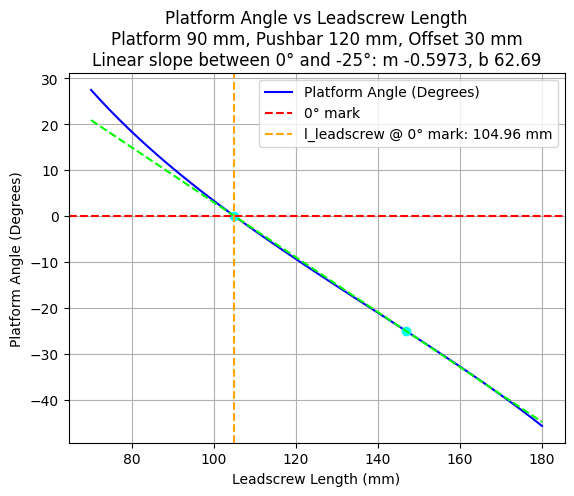

In [18]:
# calculate angle for linear input motion
import numpy as np
import matplotlib.pyplot as plt
# all length are in mm

# here are the fixed lengths
l_platform = 90
l_pushbar = 120
l_leadscrew_offset = 30

angle_zero_deg =  0
angle_pos_25_deg = 25
angle_neg_25_deg = -25

# these are variable lengths

l_leadscrew_var = np.linspace(70, 180, 50)

# calculate leadscrew length for the three different angles
l_leadscrew_zero_deg = find_leadscrew_length(angle_zero_deg, l_platform, l_pushbar, l_leadscrew_offset)

l_leadscrew_pos_25_deg = find_leadscrew_length(angle_pos_25_deg, l_platform, l_pushbar, l_leadscrew_offset)
l_leadscrew_neg_25_deg = find_leadscrew_length(angle_neg_25_deg, l_platform, l_pushbar, l_leadscrew_offset)

# slope values
# x_vals = [l_leadscrew_pos_25_deg, l_leadscrew_neg_25_deg]
x_vals = [l_leadscrew_zero_deg, l_leadscrew_neg_25_deg]
# y_vals = [angle_pos_25_deg, angle_neg_25_deg]
y_vals = [angle_zero_deg, angle_neg_25_deg]

dx = l_leadscrew_zero_deg - l_leadscrew_neg_25_deg
dy = angle_zero_deg - angle_neg_25_deg
m = dy/dx

b = -m*l_leadscrew_zero_deg

x_values = [70, 180]
y_values = [m*70+b, m*180+b]

# possible because there is a 90° angle
l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)

angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi )

gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi )

angle_platform = gamma_platform + angle_offset -90
#  Plotting the results
plt.plot(l_leadscrew_var, angle_platform, label='Platform Angle (Degrees)', color='b')
# plot the slope between the -25° and + 25°
plt.plot(x_vals, y_vals, 'bo', color="cyan")
plt.plot(x_values, y_values, linestyle="--", color="lime")

# Mark the 0° line with a vertical red dashed line
plt.axhline(0, color='r', linestyle='--', label='0° mark')
# plt.axhline(1, color='yellow', linestyle='--', label='1° mark')
plt.axvline(l_leadscrew_zero_deg, color = 'orange', linestyle='--', label=f'l_leadscrew @ 0° mark: {l_leadscrew_zero_deg:.2f} mm')

# Labels and title
plt.title(f'Platform Angle vs Leadscrew Length\nPlatform {l_platform} mm, Pushbar {l_pushbar} mm, Offset {l_leadscrew_offset} mm\nLinear slope between 0° and -25°: m {m:.4f}, b {b:.2f}')
plt.xlabel('Leadscrew Length (mm)')
plt.ylabel('Platform Angle (Degrees)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

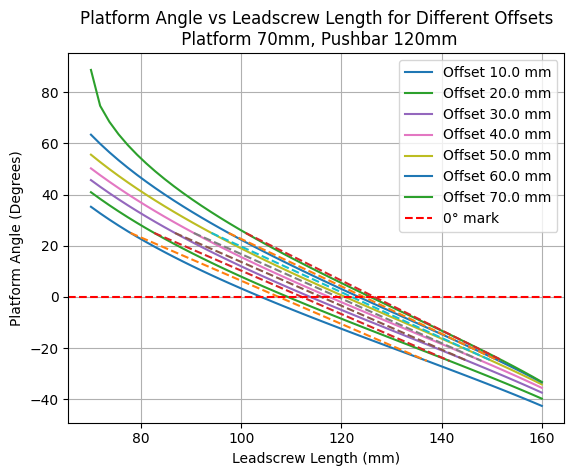

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed lengths
l_platform = 70
l_pushbar = 120

# These are variable lengths for the leadscrew
l_leadscrew_var = np.linspace(70, 160, 50)

# Define variable leadscrew offset values
l_leadscrew_offsets = np.linspace(10, 70, 7)  # e.g., 4 values from 10mm to 30mm

angle_zero_deg =  0
angle_pos_25_deg = 25
angle_neg_25_deg = -25

# l_leadscrew_zero_deg = find_leadscrew_length(angle_zero_deg, l_platform, l_pushbar, l_leadscrew_offset)

# l_leadscrew_pos_25_deg = find_leadscrew_length(angle_pos_25_deg, l_platform, l_pushbar, l_leadscrew_offset)
# l_leadscrew_neg_25_deg = find_leadscrew_length(angle_neg_25_deg, l_platform, l_pushbar, l_leadscrew_offset)

# Plot the results for each leadscrew offset
for i, l_leadscrew_offset in enumerate(l_leadscrew_offsets):
    # Calculate the hypotenuse (leadscrew length considering offset)
    l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)
    
    # Calculate the offset angle using arcsin (in degrees)
    angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi)
    
    # Calculate the gamma_platform angle using arccos (in degrees)
    gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)
    
    # Final angle of the platform
    angle_platform = gamma_platform + angle_offset - 90

    # get the leadscrew length for three different angles
    l_leadscrew_zero_deg = find_leadscrew_length(angle_zero_deg, l_platform, l_pushbar, l_leadscrew_offset)

    l_leadscrew_pos_25_deg = find_leadscrew_length(angle_pos_25_deg, l_platform, l_pushbar, l_leadscrew_offset)
    l_leadscrew_neg_25_deg = find_leadscrew_length(angle_neg_25_deg, l_platform, l_pushbar, l_leadscrew_offset)

    # slope points between -25° and 25°
    x_vals = [l_leadscrew_pos_25_deg, l_leadscrew_neg_25_deg]
    y_vals = [angle_pos_25_deg, angle_neg_25_deg]

    # plt.plot(l_leadscrew_zero_deg, 0)
    
    # Plot each offset in a different color
    plt.plot(l_leadscrew_var, angle_platform, label=f'Offset {l_leadscrew_offset:.1f} mm')
    # Plot each slope between the -25° and + 25° in a different color
    plt.plot(x_vals, y_vals, linestyle="--")

# Mark the 90° line with a red dashed line
plt.axhline(0, color='r', linestyle='--', label='0° mark')

# Labels and title
plt.title(f'Platform Angle vs Leadscrew Length for Different Offsets\n Platform {l_platform}mm, Pushbar {l_pushbar}mm')
plt.xlabel('Leadscrew Length (mm)')
plt.ylabel('Platform Angle (Degrees)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


/tmp/ipykernel_4508/130667266.py:23: RuntimeWarning: invalid value encountered in arccos
  gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)


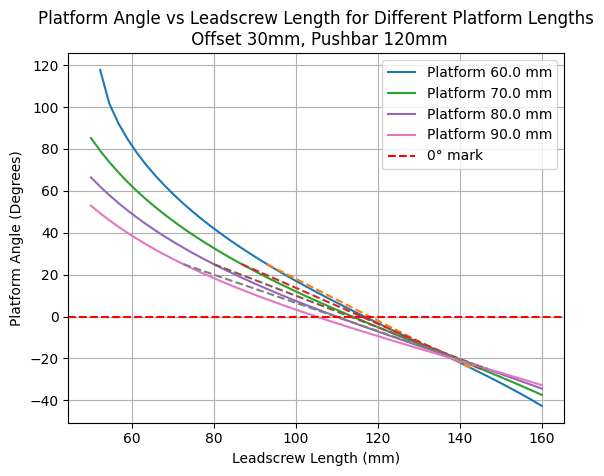

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed lengths
l_pushbar = 120  # Keep this fixed
l_leadscrew_offset = 30  # Keep this fixed

# These are variable lengths for the leadscrew
l_leadscrew_var = np.linspace(50, 160, 50)

# Define variable platform lengths (l_platform)
l_platforms = np.linspace(60, 90, 4)  # 4 values for l_platform from 60mm to 90mm

# Plot the results for each platform length
for l_platform in l_platforms:
    # Calculate the hypotenuse (leadscrew length considering offset)
    l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)
    
    # Calculate the offset angle using arcsin (in degrees)
    angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi)
    
    # Calculate the gamma_platform angle using arccos (in degrees)
    gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)
    
    # Final angle of the platform
    angle_platform = gamma_platform + angle_offset - 90

    # get the leadscrew length for three different angles
    l_leadscrew_zero_deg = find_leadscrew_length(angle_zero_deg, l_platform, l_pushbar, l_leadscrew_offset)

    l_leadscrew_pos_25_deg = find_leadscrew_length(angle_pos_25_deg, l_platform, l_pushbar, l_leadscrew_offset)
    l_leadscrew_neg_25_deg = find_leadscrew_length(angle_neg_25_deg, l_platform, l_pushbar, l_leadscrew_offset)

    # slope points between -25° and 25°
    x_vals = [l_leadscrew_pos_25_deg, l_leadscrew_neg_25_deg]
    y_vals = [angle_pos_25_deg, angle_neg_25_deg]
    
    # Plot each platform length in a different color
    plt.plot(l_leadscrew_var, angle_platform, label=f'Platform {l_platform:.1f} mm')
    # Plot each slope between the -25° and + 25° in a different color
    plt.plot(x_vals, y_vals, linestyle="--")

# Mark the 0° line with a red dashed line
plt.axhline(0, color='r', linestyle='--', label='0° mark')

# Labels and title
plt.title(f'Platform Angle vs Leadscrew Length for Different Platform Lengths\n Offset {l_leadscrew_offset}mm, Pushbar {l_pushbar}mm')
plt.xlabel('Leadscrew Length (mm)')
plt.ylabel('Platform Angle (Degrees)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


/tmp/ipykernel_4508/1997870823.py:20: RuntimeWarning: invalid value encountered in arcsin
  angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi)
/tmp/ipykernel_4508/1997870823.py:23: RuntimeWarning: invalid value encountered in arccos
  gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)


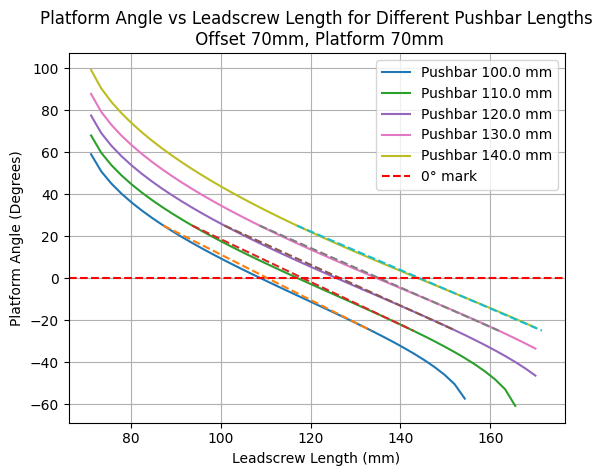

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed lengths
l_platform = 70  # Keep this fixed
l_leadscrew_offset = 70  # Keep this fixed

# These are variable lengths for the leadscrew
l_leadscrew_var = np.linspace(60, 170, 50)

# Define variable pushbar lengths (l_pushbar)
l_pushbars = np.linspace(100, 140, 5)  # 4 values for l_pushbar from 110mm to 140mm

# Plot the results for each pushbar length
for l_pushbar in l_pushbars:
    # Calculate the hypotenuse (leadscrew length considering offset)
    l_leadscrew_hypo = np.sqrt(l_leadscrew_var**2 + l_leadscrew_offset**2)
    
    # Calculate the offset angle using arcsin (in degrees)
    angle_offset = np.arcsin(l_leadscrew_offset / l_leadscrew_var) * (180 / np.pi)
    
    # Calculate the gamma_platform angle using arccos (in degrees)
    gamma_platform = np.arccos((l_platform**2 + l_leadscrew_hypo**2 - l_pushbar**2) / (2 * l_platform * l_leadscrew_hypo)) * (180 / np.pi)
    
    # Final angle of the platform
    angle_platform = gamma_platform + angle_offset - 90

    # get the leadscrew length for three different angles
    l_leadscrew_zero_deg = find_leadscrew_length(angle_zero_deg, l_platform, l_pushbar, l_leadscrew_offset)

    l_leadscrew_pos_25_deg = find_leadscrew_length(angle_pos_25_deg, l_platform, l_pushbar, l_leadscrew_offset)
    l_leadscrew_neg_25_deg = find_leadscrew_length(angle_neg_25_deg, l_platform, l_pushbar, l_leadscrew_offset)

    # slope points between -25° and 25°
    x_vals = [l_leadscrew_pos_25_deg, l_leadscrew_neg_25_deg]
    y_vals = [angle_pos_25_deg, angle_neg_25_deg]
    
    # Plot each pushbar length in a different color
    plt.plot(l_leadscrew_var, angle_platform, label=f'Pushbar {l_pushbar:.1f} mm')
    # Plot each slope between the -25° and + 25° in a different color
    plt.plot(x_vals, y_vals, linestyle="--")

# Mark the 0° line with a red dashed line
plt.axhline(0, color='r', linestyle='--', label='0° mark')

# Labels and title
plt.title(f'Platform Angle vs Leadscrew Length for Different Pushbar Lengths\n Offset {l_leadscrew_offset}mm, Platform {l_platform}mm')
plt.xlabel('Leadscrew Length (mm)')
plt.ylabel('Platform Angle (Degrees)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
